# Using sovle_ivp function of python to initial value problem and then using eigen values

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
t = np.linspace(0, 10, 1000)

# Initial State
x0 = [2, -3]    
        
# A matrix
A = np.array([[0, 1], 
              [-2, -3]])   

## Using solve_ivp function from scipy

In [3]:
def linear_ode(t, x):
    return A @ x

linear_ode_solution = solve_ivp(linear_ode, (0, 10), x0, t_eval=t)

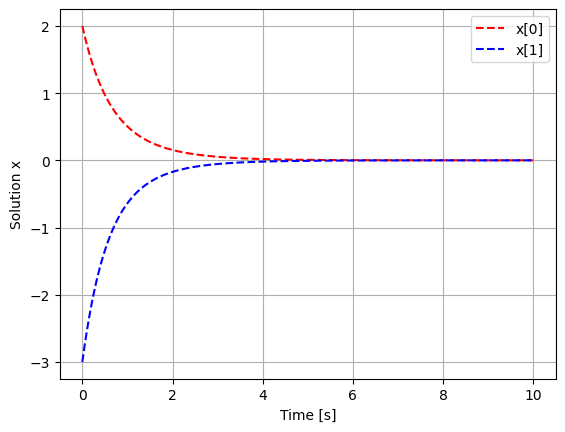

In [4]:
x = linear_ode_solution.y
plt.plot(t, x[0, :], 'r--')
plt.plot(t, x[1, :], 'b--')
plt.xlabel('Time [s]')
plt.ylabel('Solution x')
plt.legend(['x[0]', 'x[1]'])
plt.grid(True)

## Using eigen values and vectors of A to solve the differential equations

In [5]:
# Using np.linalg.eig to find eigen values and eigen vectors
#Eigen values are output as a list and the eigen vectors are output as unit vectors
val, vec = np.linalg.eig(A)

In [6]:
# Diagonal matrix with eigen values as elements
D = np.array([[val[0], 0],
             [0, val[1]]])

T = vec

In [7]:
x_t = np.zeros((2, 1000))
x_t[:, 0] = x0

In [8]:
for k in range(len(t)):
    # Introducing v to find out exp(D*t)
    v = np.exp(D*t[k])
    
    # Making the non diagonal elements 0
    v[0][1] = 0
    v[1][0] = 0
    
    # x(t) = T*exp(Dt)*inv(T)*x0
    x_t[:, k] = T @ v @ np.linalg.inv(T) @ x0

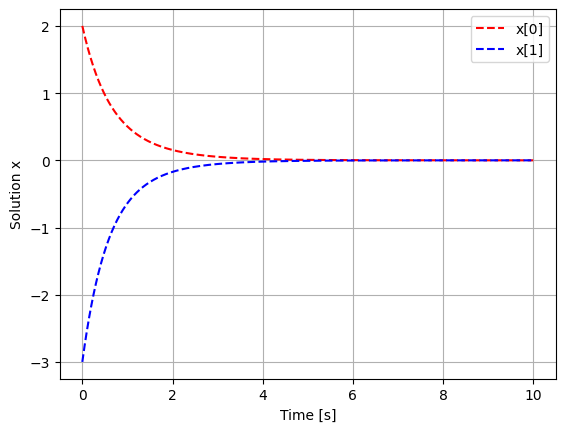

In [9]:
plt.plot(t, x_t[0, :], 'r--')
plt.plot(t, x_t[1, :], 'b--')
plt.xlabel('Time [s]')
plt.ylabel('Solution x')
plt.legend(['x[0]', 'x[1]'])
plt.grid(True)